# Colony Simulations

In [1]:
# Make sure notebook runs out of vivarium-ecoli directory
import sys, os

# get the path to the notebook, and change working directory
notebook_path = sys.path[0][:sys.path[0].index('notebooks')]
sys.path.append(notebook_path)
os.chdir(sys.path[-1])
cwd = os.getcwd()
  
# print the current directory
# print("Current working directory is:", cwd)

In [7]:
from vivarium.core.composition import simulate_composite
from vivarium.library.units import units
from vivarium.plots.topology import plot_topology
from vivarium_multibody.plots.snapshots import plot_snapshots, format_snapshot_data
from ecoli.experiments.colony import Lattice, make_lattice_config, GrowDivide

## simulation parameters

In [3]:
diffusion_rate = 0.001
initial_concentration = 1.0
bins = [10, 10]
bounds = [10, 10]
growth_rate = 0.0005
growth_noise = 10**-6
depth = 10
total_time = 5000

## make a Lattice environment with a GrowDivide agent

In [8]:
lattice_config = make_lattice_config(
        bounds=bounds,
        n_bins=bins,
        concentrations={
            'glc': initial_concentration},
        diffusion=diffusion_rate,
        depth=depth)

# make the composite
lattice_composer = Lattice(lattice_config)
lattice_composite = lattice_composer.generate()

growth_config = {
    'default_growth_rate': growth_rate,
    'default_growth_noise': growth_noise,
}
grow_divide_composer = GrowDivide({
    'agent_id': '0',
    'growth': growth_config,
})

agent_id = '0'
grow_divide_composite = grow_divide_composer.generate(path=('agents', agent_id))
lattice_composite.merge(composite=grow_divide_composite)

## plot topology

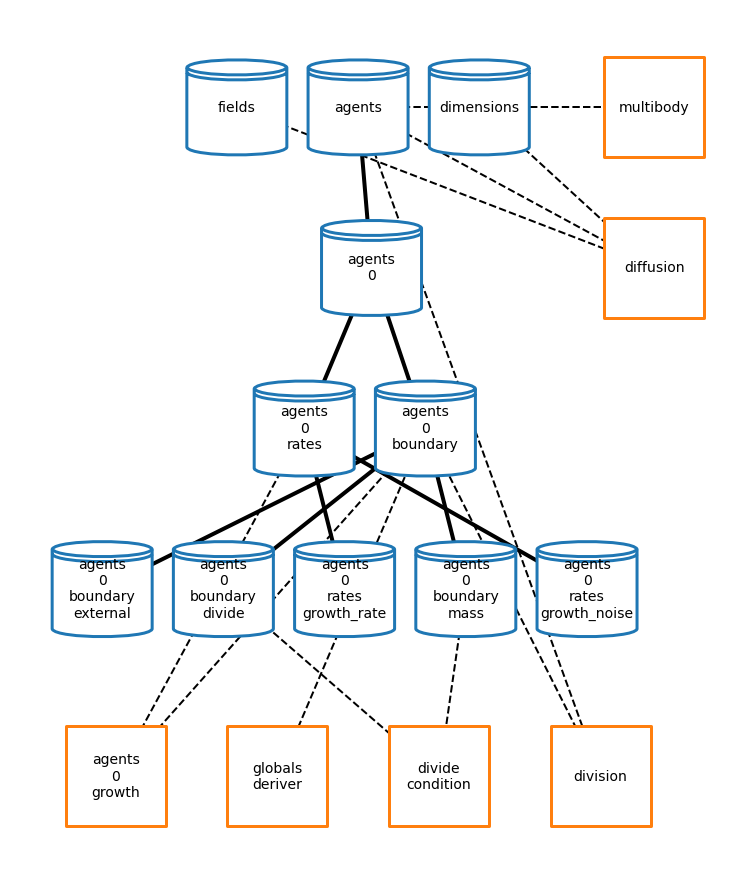

In [25]:
# hierarchy topology plot
node_space = 1.2
process_column = -0.2
agent_row = -5
agent_column = 1


topology_plot_settings = {
    'graph_format': 'hierarchy',
    'show_ports': False,
    'dashed_edges': True,
    'node_size': 10000,
    'coordinates': {
        # Env Processes
        'multibody': (5, 0),
        'diffusion': (5, -node_space),
        # Agent Processes
        'agents\n0\ngrowth': (agent_column, agent_row),
        'agents\n0\nglobals_deriver': (agent_column+node_space, agent_row),
        'agents\n0\ndivide_condition': (agent_column+2*node_space, agent_row),
        'agents\n0\ndivision': (agent_column+3*node_space, agent_row),
    },
    'node_labels': {
        # Agent Processes
        'agents\n0\nglobals_deriver': 'globals\nderiver',
        'agents\n0\ndivide_condition': 'divide\ncondition',
        'agents\n0\ndivision': 'division',
    },
}
fig = plot_topology(lattice_composite, topology_plot_settings)

## run a simulation

In [5]:
agent_id = '0'
initial_state = {
    'agents': {
        agent_id: {
            'global': {
                'mass': 1000 * units.femtogram}
        }}}

sim_settings = {
    'total_time': total_time,
    'initial_state': initial_state,
    'return_raw_data': True,
}
lattice_grow_divide_data = simulate_composite(lattice_composite, sim_settings)


Simulation ID: ee9124a6-208d-11ec-91a8-8c85908ac627
Created: 09/28/2021 at 11:57:30
Completed in 25.27 seconds


## plot simulation output

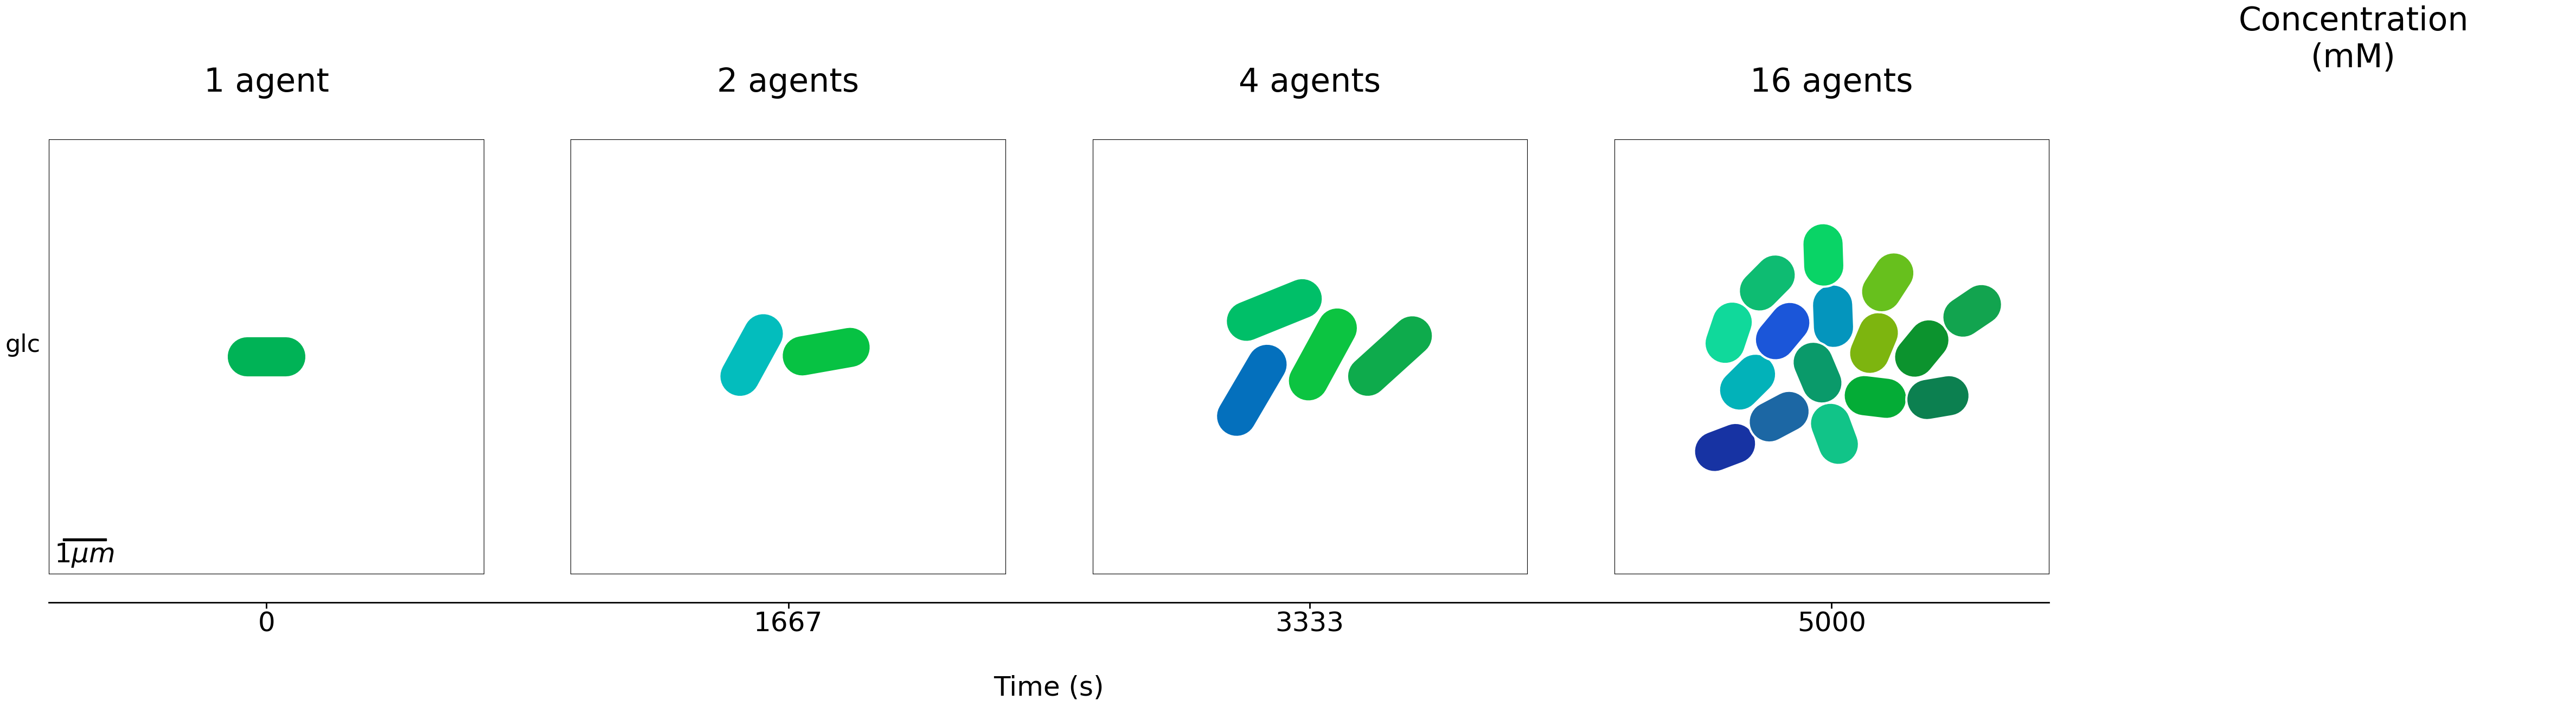

In [6]:
# format the data for plot_snapshots
agents, fields = format_snapshot_data(lattice_grow_divide_data)

# save snapshots figure
fig = plot_snapshots(
    bounds,
    agents=agents,
    fields=fields,
    n_snapshots=4,
)